In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("./data/master/master_apartaments_data_cleaned.csv", index_col = None, header=0)

In [10]:
df['pricePerSqm'] = df['price']/df['squareMeters']


Text(0.5, 1.0, 'Rozkład Ceny za M²')

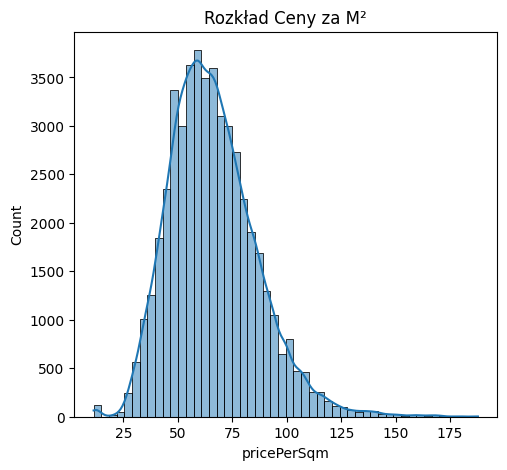

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['pricePerSqm'], kde=True, bins=50)
plt.title('Rozkład Ceny za M²')

In [ ]:
df['log_price'] = np.log1p(df['price'])
current_year = 2025

df['building_age'] = np.where(
    df['buildYear'] != -1, 
    current_year - df['buildYear'], 
    -1
)

df['month'] = df['dataDate'].str.split('_').str[-1].astype(int)



In [14]:
categorical_cols = ['city', 'type', 'buildingEra', 'condition', 
                    'buildingMaterial', 'floorCount', 'hasElevator'] 

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Liczba kolumn po kodowaniu: {df_encoded.shape[1]}")

Liczba kolumn po kodowaniu: 84


In [15]:
df.to_csv('./data/master/master_apartaments_data_cleaned.csv', index=False, encoding='utf-8')
df_encoded.to_csv('./data/master/master_apartaments_data_encoded.csv', index=False, encoding='utf-8')